<a href="https://colab.research.google.com/github/Efemirkan/Applied-Natural-Language-Processing/blob/main/ANLPassignment2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANLP Assignment: Sentiment Classification

In this assignment, you will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

For assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

In [3]:
candidateno=22417621 #this MUST be updated to your candidate number so that you get a unique data sample


In [4]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [5]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the
            pair is a list of the training data and the second is a list of the test data.
    """

    data = list(data)
    n = len(data)
    train_indices = random.sample(range(n), int(n * ratio))
    test_indices = list(set(range(n)) - set(train_indices))
    train = [data[i] for i in train_indices]
    test = [data[i] for i in test_indices]
    return (train, test)


def get_train_test_data():

    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')

    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]

    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [6]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['capsule', ':', 'trippy', ',', 'hyperspeed', 'action', ...], 'pos')


1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

In [7]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [71]:
def normalized_tokens(data):

  # C normalisation
  case_normalised_token = [token.lower() for token in data]

  # Replace digits with "NUM"
  normalised_token_first = ["NUM" if token.isdigit() else token for token in case_normalised_token]

  # Replace ordinals with "Nth"
  normalised_token = ["Nth" if (token.endswith(("nd","st","th","rd")) and token[:-2].isdigit()) else token for token in normalised_token_first]

  return normalised_token

def stopword_removal(data):
  stop = stopwords.words('english')

  # Remove stopwords and token not made of only letters
  filtered_token_first = [token for token in data if token.isalpha() and token not in stop ]

  # Remove "NUM" and "Nth"
  filtered_token = [token for token in filtered_token_first if token not in ["NUM", "Nth"]]

  return filtered_token

def lemmatize_tokens(data):
  lem = WordNetLemmatizer()

  # Lemmatize the tokens
  lemmatize_token = [lem.lemmatize(token) for token in data]

  return lemmatize_token

# Perform full preprocessing
def data_cleaning(data):
  normalised_reviews = normalized_tokens(data)
  filtered_reviews = stopword_removal(normalised_reviews)
  cleaned_data = lemmatize_tokens(filtered_reviews)

  return cleaned_data


In [69]:
# Build a frequency distribution of all tokens from positive reviews
pos_freq_dist = FreqDist()

# Iterate over training_data to collect only positive review
# and append the pos_freq_dist after perform preprocessing
for tokens, label in training_data:
    if label == "pos":
        cleaned = data_cleaning(tokens)
        pos_freq_dist += FreqDist(cleaned)

pos_freq_dist

FreqDist({'film': 4141, 'movie': 2286, 'one': 2192, 'character': 1417, 'like': 1327, 'time': 1077, 'story': 982, 'scene': 969, 'make': 937, 'get': 926, ...})

In [72]:
# Build a frequency distribution of all tokens from negative reviews
neg_freq_dist = FreqDist()

# Iterate over training_data to collect only negative review
# and append the neg_freq_dist after perform preprocessing
for tokens, label in training_data:
    if label == "neg":
        cleaned = data_cleaning(tokens)
        neg_freq_dist += FreqDist(cleaned)

neg_freq_dist

FreqDist({'film': 3532, 'movie': 2755, 'one': 2032, 'like': 1366, 'character': 1305, 'get': 1067, 'time': 1028, 'even': 1000, 'make': 952, 'scene': 926, ...})

In [74]:
# Find the top k words that appear more in freq1 than freq2
def most_frequent_words(freq1,freq2,k):

    difference = freq1-freq2  # frequency differences
    sorted_diff = difference.most_common()  # sorted by highest difference
    mostwords = [token for (token, freq) in sorted_diff[:k]]  # collect top k tokens

    return mostwords

a)

In [52]:
# Get the 10 most frequent positive tokens
positive_word_list = most_frequent_words(pos_freq_dist,neg_freq_dist,10)
positive_word_list

['film',
 'life',
 'great',
 'also',
 'well',
 'story',
 'best',
 'war',
 'performance',
 'world']

b)

In [75]:
# Get the 10 most frequent positive tokens
negative_word_list = most_frequent_words(neg_freq_dist,pos_freq_dist,10)
negative_word_list

['bad',
 'movie',
 'plot',
 'even',
 'minute',
 'script',
 'get',
 'guy',
 'worst',
 'boring']

c)

First a preprocessing pipeline was created. In **normalized_tokens**, every token was lowercased, pure numbers were replaced with “NUM”, and ordinal forms such as “1st” or “3rd” were turned into “Nth”. This was done to make the text consistent and easier to analyse.

Next **stopword_removal** was applied. Stopwords were removed, only alphabetic tokens were kept, and the placeholders “NUM” and “Nth” were filtered out. This step was used to keep only meaningful content words.

Then **lemmatize_tokens** was used. Each remaining token was lemmatized to its base form with WordNet so that different word forms could be treated as the same feature.

These steps were combined inside **data_cleaning**, so each raw review could be turned into a clean list of informative tokens.

After the cleaning pipeline was set up, two frequency distributions were built. As the training data was processed, cleaned positive reviews were added to the **pos_freq_dist**, and cleaned negative reviews were added to **ponegs_freq_dist**. In this way the total word counts for each class were collected separately.

Finally, **most_frequent_words** was used to identify words that appeared more often in one class than the other. With this function, **positive_word_list** was produced containing the ten tokens most associated with positive reviews and **negative_word_list** was produced containing the ten tokens most associated with negative reviews.

2)
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


a)

In [76]:
class SimpleClassifier(ClassifierI):

    def __init__(self, pos, neg, k):
        # Store positive and negative token lists and k
        self._pos = pos
        self._neg = neg
        self._k = k

    def classify(self, doc):
        # Compute how many positive and negative tokens appear
        score = 0

        for word, count in doc.items():
          if word in self._pos:
            score += count  # Increase score for positive tokens
          if word in self._neg:
            score-= count  # Decrease score for negative tokens

        # Decide final label based on score
        if score > 0:
          return "pos"
        elif score == 0:
          return random.choice(["pos", "neg"])  # Resolve tied cases
        else:
          return "neg"

    def train(self,training_data):

        # Build frequency distributions for positive and negative reviews
        pos_freq_dist=FreqDist()
        neg_freq_dist=FreqDist()

        for reviewDist,label in training_data:
            if label=='pos':
                pos_freq_dist+=reviewDist
            else:
                neg_freq_dist+=reviewDist

        # Get the k most frequent tokens
        self._pos=most_frequent_words(pos_freq_dist,neg_freq_dist,self._k)
        self._neg=most_frequent_words(neg_freq_dist,pos_freq_dist,self._k)

    def labels(self):
        # Return the class labels
        return ("pos", "neg")

In [80]:
# Create a classifier using positive_word_list, negative_word_list and top 100 tokens
movie_classifier = SimpleClassifier(positive_word_list, negative_word_list, 100)

# Preprocess reviews and convert it into a FreqDist for training_data
training_norm = [(FreqDist(data_cleaning(review)),label) for (review,label) in training_data]

# Train the classifier with training_norm
movie_classifier.train(training_norm)

b)

First **SimpleClassifier** class was defined. Since **SimpleClassifier(ClassifierI)** was used, the class was created as a subclass of **ClassifierI**, which means the required classify method from the abstract interface had to be implemented. Inside **classify**, a score was calculated by adding counts for words found in the positive list and subtracting counts for words found in the negative list. When the score was positive or negative, the review was assigned that label. When the score was exactly zero, a random choice between “pos” and “neg” was used so that tied cases were resolved without bias toward either class.

Next the **train** method was used. For each review in the training data, its frequency distribution was added either to the positive distribution or the negative distribution depending on its label. After all reviews were processed, the most informative words for each class were extracted using **most_frequent_words**, and these word lists were stored in the classifier.

After the class was created, a classifier instance was constructed with initial positive and negative word lists and a chosen value of k. The training data was then cleaned and converted into frequency distributions. Finally, the **train** method was called so that the classifier could learn updated positive and negative word lists from the processed training set.

3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

In [78]:
class ConfusionMatrix:
    def __init__(self,predictions,goldstandard,classes=("pos","neg")):

        # Define the two class labels
        (self.c1,self.c2)=classes

        # Initialise confusion matrix counts
        self.TP=0   # true positives
        self.FP=0   # false positives
        self.FN=0   # false negatives
        self.TN=0   # true negatives

        # Compare predictions with true labels
        for p,g in zip(predictions,goldstandard):
            if g==self.c1:    # gold label is positive
                if p==self.c1:
                    self.TP+=1     # predicted positive correctly
                else:
                    self.FN+=1    # predicted negative incorrectly

            elif p==self.c1:
                self.FP+=1    # predicted positive incorrectly
            else:
                self.TN+=1    # predicted negative correctly

    # Compute accuracy
    def accuracy(self):

        # correct predictions / all predictions
        return (self.TP + self.TN) / (self.TP + self.FP + self.FN + self.TN)

    # Compute precision
    def precision(self):

        # correct positive predictions / all predicted positives
        return self.TP / (self.TP + self.FP)

    # Compute recall
    def recall(self):

        # correct positive predictions / all actual positives
        return self.TP / (self.TP + self.FN)

    # Compute F1 score
    def f1(self):

        # harmonic mean of precision and recall
        p = self.precision()
        r = self.recall()
        return 2 * p * r / (p + r)

In [79]:
# Preprocess reviews and convert it into a FreqDist for testing_data
testing_norm  = [(FreqDist(data_cleaning(wordlist)),label) for (wordlist,label) in testing_data]

In [81]:
# Separate the test documents and labels
docs,labels=zip(*testing_norm)

# Classify all test documents
preds = movie_classifier.classify_many(docs)

# Build a confusion matrix using predictions and labels
cm = ConfusionMatrix(preds, labels)

# Print evaluation metrics
print("Simple classifier:")
print(f"Accuracy: {cm.accuracy()}")
print(f"Precision: {cm.precision()}")
print(f"Recall: {cm.recall()}")
print(f"F1: {cm.f1()}")

Simple classifier:
Accuracy: 0.6383333333333333
Precision: 0.5859213250517599
Recall: 0.9433333333333334
F1: 0.722860791826309


b)

It is not always reasonable to evaluate a classifier only by **accuracy**. Accuracy measures how many predictions were correct overall, but it does not show how the classifier behaves with respect to each class. **If the dataset is unbalanced** or **if one type of error matters more than the other**, accuracy can give a misleading impression of performance.

A counter-example where accuracy would **not be a good measure** is **when one class is much more frequent than the other**. Suppose a dataset contains ninety percent positive reviews and ten percent negative reviews. A classifier that always predicts “pos” would achieve ninety percent accuracy, but it would be completely useless at identifying negative reviews. In this situation, precision, recall and F1 provide a much better picture.

A counter-example where accuracy would **be reasonable** is **when the classes are balanced and the cost of misclassifying either class is the same**. If positive and negative reviews appear in similar proportions and both types of errors are equally important, then accuracy gives a fair summary of how well the classifier performs.

4)
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results.

[12.5\%]

a)

In [109]:
from nltk.classify import NaiveBayesClassifier

# Train an NLTK Naive Bayes classifier with training_norm
movie_naive_classifier = NaiveBayesClassifier.train(training_norm)

In [110]:
# Separate the test documents and labels
docs,labels=zip(*testing_norm)

# Classify all test documents
preds_movie_naive = movie_naive_classifier.classify_many(docs)

# Build a confusion matrix using predictions and labels
cm_movie_naive = ConfusionMatrix(preds_movie_naive, labels)

# Print evaluation metrics
print("Naive Bayes classifier:")
print(f"Accuracy: {cm_movie_naive.accuracy()}")
print(f"Precision: {cm_movie_naive.precision()}")
print(f"Recall: {cm_movie_naive.recall()}")
print(f"F1: {cm_movie_naive.f1()}")

Naive Bayes classifier:
Accuracy: 0.7733333333333333
Precision: 0.6990291262135923
Recall: 0.96
F1: 0.8089887640449438


b)

In [111]:
# Create a comparison table for both classifiers
df_results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Simple Classifier": [cm.accuracy(), cm.precision(), cm.recall(), cm.f1()],
    "Naive Bayes Classifier": [cm_movie_naive.accuracy(), cm_movie_naive.precision(), cm_movie_naive.recall(), cm_movie_naive.f1()]
})

# Set the metric column as the index
df_results = df_results.set_index("Metric")
df_results

,Simple Classifier,Naive Bayes Classifier
Metric,,
Accuracy,0.638333,0.773333
Precision,0.585921,0.699029
Recall,0.943333,0.960000
F1 Score,0.722861,0.808989


The performance of the **Naive Bayes classifier** was noticeably stronger than the performance of the **word list classifier**. This can be understood by looking at both the numerical results and the behaviour of the two models.

The **Naive Bayes classifier** achieved higher **accuracy**. This means that a larger proportion of the test reviews was assigned the correct label. In contrast, the **word list classifier** reached only about sixty four percent accuracy, which indicates that many reviews were misclassified. The improvement can be explained mathematically because Naive Bayes uses the full likelihood of the document, which can be expressed as:

$$\begin{eqnarray*}
P(\,d\,|\,c\,) &=& P(\,\{w_1,\ldots,w_n\}\,|\,c\,)\\
&=& \prod_{i=1}^n P(\,w_i\,|\,c\,)
\end{eqnarray*}$$

where every word contributes to the overall decision. Since the entire distribution of words is used, more evidence is collected from each review.

**Precision** was also higher for the **Naive Bayes classifier**. For the **word list classifier**, many reviews predicted as positive were actually negative. This pattern occurs because the **word list classifier** relies only on a fixed list of words and assigns a positive score whenever such words appear. If a negative review contains a few words typically associated with positive sentiment, the classifier is easily misled. **Naive Bayes classifier** reduces this problem because the probability of all observed words is considered. A single misleading word receives less influence when many other words provide contradictory evidence.

**Recall** was very high for both models, but the underlying reasons differ. The **word list classifier** reached extremely high recall because it almost always produced a positive prediction. This behaviour inflates recall but does not represent balanced performance. **Naive Bayes** achieved similarly high recall while maintaining much better precision, which indicates that it successfully captured most positive reviews without heavily misclassifying negative ones.


The **F1 scores** further highlight this difference. Since **F1** is defined as:

$$F1 = \frac{2(\text{precision} \times \text{recall})}{\text{precision} + \text{recall}}$$

a higher value indicates more balanced decision making. The **Naive Bayes classifier** achieved a noticeably higher **F1 score**, showing that it provided both reliable and complete detection of the positive class.

The contrast between the two models can be understood by considering how each one represents textual information. In the **word list classifier**, only a small set of discriminative words is used, and all other vocabulary is effectively ignored. As a result, the representation of each review becomes very limited. If a review expresses sentiment using words that do not appear in these lists, that information is simply not captured, and the classifier cannot respond to it.

In the **Naive Bayes classifier**, a probability distribution is learned for every word in the training data. During classification, evidence from all observed words is combined, which means that even weaker indicators of sentiment can contribute to the final decision. This produces a much richer and more flexible representation of each review, allowing finer distinctions in how sentiment is expressed to be reflected in the model’s predictions.

Overall, the results show that the **word list classifier** is simple and interpretable but too restrictive. The **Naive Bayes classifier** benefits from its probabilistic model and from using the full set of features, which allows it to provide more accurate, more precise and more reliable sentiment predictions.

5)
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions.

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


a)

In [101]:
def different_topk_simple_classfier(k):

  # Create a simple classifier
  def_classfier = SimpleClassifier(positive_word_list, negative_word_list, k)

  # Train classfier with training_norm
  def_classfier.train(training_norm)

  # Separate the test documents and labels
  docs, gold = zip(*testing_norm)

  # Classify all test documents
  preds = def_classfier.classify_many(docs)

  # Build a confusion matrix
  cm = ConfusionMatrix(preds, gold)

  # Return evaluation metrics for k value in dictionary
  return {"k": k, "Accuracy": cm.accuracy(), "Precision": cm.precision(), "Recall": cm.recall(), "F1": cm.f1()}

In [104]:
k_values = [50, 100, 150, 200, 300, 500, 1000]  # store different k values

In [105]:
# Obtain results for every k values in the list and store them
result = [different_topk_simple_classfier(k) for k in k_values]

a)

In [106]:
# Build dataframe with results
df_results = pd.DataFrame(result)
df_results = df_results.set_index("k")  # set k values as index
df_results

,Accuracy,Precision,Recall,F1
k,,,,
50,0.613333,0.569959,0.923333,0.704835
100,0.633333,0.582305,0.943333,0.720102
150,0.666667,0.608225,0.936667,0.737533
200,0.661667,0.604752,0.933333,0.733945
300,0.656667,0.599576,0.943333,0.733161
500,0.680000,0.616379,0.953333,0.748691
1000,0.671667,0.611231,0.943333,0.741809


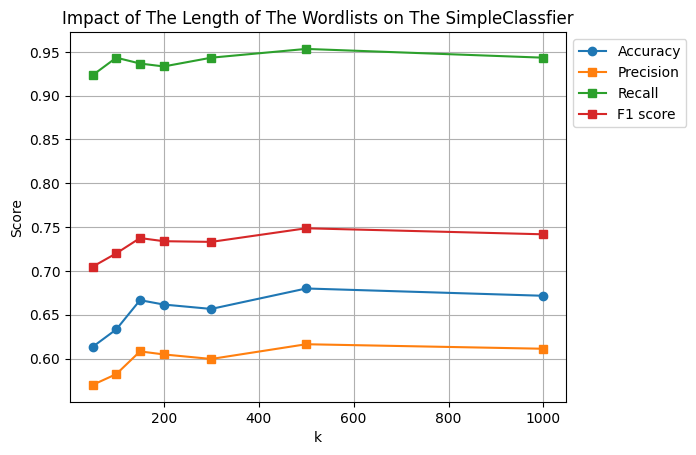

In [108]:
# Plot how different k values impact classifier performance
plt.figure()

# Plot accuracy, precision, recall, and F1 scores
plt.plot(df_results.index, df_results["Accuracy"], marker="o", label="Accuracy")
plt.plot(df_results.index, df_results["Precision"], marker="s", label="Precision")
plt.plot(df_results.index, df_results["Recall"], marker="s", label="Recall")
plt.plot(df_results.index, df_results["F1"], marker="s", label="F1 score")

# Label axes and title
plt.xlabel("k")
plt.ylabel("Score")
plt.title("Impact of The Length of The Wordlists on The SimpleClassfier")

# Add legend and grid
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

# Design Decisions
The experiment was designed to investigate how the length of the wordlists impact the performance of the **SimpleClassifier**. The value of **k** was treated as the independent variable, and a range of list sizes was selected in order to examine both small and large wordlists. The values of **k** were chosen to cover a wide range, beginning with moderately short lists and increasing gradually to substantially larger ones. This made it possible to observe whether performance improves steadily, remains steady, or declines.

The same training set and test set were used for every value of **k** so that the results would be comparable. All reviews were preprocessed in a consistent way before being converted into frequency distributions. For each value of **k**, a new **SimpleClassifier** instance was trained from the same data. This ensured that any differences in performance could be attributed to the size of the wordlists rather than to randomness in the data.

The experiment focused on **accuracy, precision, recall and F1 score** as evaluation measures, because these metrics capture different aspects of classifier behaviour. Once each classifier had been trained, its predictions on the test data were collected and a **confusion matrix** was constructed. The scores were then recorded and organised into a table. A line plot was produced to visualise how the performance changed as the wordlists grew larger. The plot made it easier to identify trends in the results and to interpret the relationship between k and classification quality.

# Discussion of conclusions

The results of the experiment show that the performance of the **SimpleClassifier** is sensitive to the length of the wordlists, although the relationship is not entirely linear. When the lists are relatively short, such as **k = 50**, the classifier achieves the lowest accuracy in the experiment. This suggests that a small number of discriminating words does not provide enough information to distinguish the sentiment of the reviews in a reliable way. As the value of **k** increases, the classifier begins to perform better, and this improvement is visible in both accuracy and F1 score. The increase between **k = 50** and **k = 150** is especially noticeable, and it indicates that adding more discriminative words gives the classifier access to a richer set of sentiment cues.

However, the results also show that the gains start to level off once the lists become moderately large. Between **k = 150** and **k = 300**, the changes in **accuracy** and **F1** score are minor, which suggests that the classifier is no longer gaining much additional benefit from extending the wordlists. Very large lists, such as **k = 1000**, do not produce a dramatic drop in performance, but they also do not lead to further improvement. This pattern indicates that the classifier begins to incorporate many words that contribute little to the final prediction. These words introduce noise and reduce the influence of the most informative terms.

The highest accuracy was observed at **k = 500**, and the highest F1 score occurred at the same point. This suggests that there may be an optimal range where the wordlists are large enough to capture most of the sentiment vocabulary while still being selective enough to avoid excessive noise. The shape of the graph supports this interpretation, as performance rises steadily from **k = 50** to **k = 150**, stabilises around **k = 200**, and reaches a peak at **k = 500** before flattening out again.

Overall, the experiment indicates that the **word list classifier** benefits from longer lists up to a certain point, but that extremely large lists do not guarantee better performance. An intermediate value of **k** appears to offer the best balance between coverage and noise, which is typical for **simple bag-of-words models** that depend heavily on the discriminative power of individual tokens.

b)

The results obtained in this study show that the **Naive Bayes classifier** performs better than the **wordlist classifier** across all evaluation measures. It produced higher accuracy and F1 scores, and it achieved more balanced precision and recall. This indicates that **Naive Bayes** is able to make use of a wider range of information in the reviews, whereas the wordlist classifier relies only on a limited set of discriminating words.

The experiment on different values of **k** also showed that the **wordlist classifier** is highly sensitive to the size of the lists. Its performance changes noticeably when **k** is altered, and it can decline when the lists become too small or too large. In contrast, the **Naive Bayes model** remains stable because it works with the full distribution of tokens rather than depending on a small number of selected words.

For these reasons, **Naive Bayes** would be recommended for future work. It is more robust, it generalises better to unseen data, and it requires fewer manual design decisions. The **wordlist classifier** is simple and interpretable, but the **Naive Bayes model** offers more reliable and consistent performance for sentiment classification.

**Word count (excluding code, tables,formulas,headings and graphs): 1914 words**